In [2]:
pip install kagglehub pandas numpy matplotlib seaborn scikit-learn xgboost

  Using cached xgboost-3.0.0-py3-none-win_amd64.whl.metadata (2.1 kB)
   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 1.8/150.0 MB 18.1 MB/s eta 0:00:09
    --------------------------------------- 2.9/150.0 MB 9.3 MB/s eta 0:00:16
   - -------------------------------------- 4.2/150.0 MB 8.3 MB/s eta 0:00:18
   - -------------------------------------- 5.2/150.0 MB 7.5 MB/s eta 0:00:20
   - -------------------------------------- 7.1/150.0 MB 7.0 MB/s eta 0:00:21
   -- ------------------------------------- 8.4/150.0 MB 6.9 MB/s eta 0:00:21
   -- ------------------------------------- 9.4/150.0 MB 6.7 MB/s eta 0:00:21
   -- ------------------------------------- 10.7/150.0 MB 6.5 MB/s eta 0:00:22
   --- ------------------------------------ 11.8/150.0 MB 6.4 MB/s eta 0:00:22
   --- ------------------------------------ 12.8/150.0 MB 6.3 MB/s eta 0:00:22
   --- ------------------------------------ 14.4/150.0 MB 6.3 MB/s eta 0:00

In [3]:
import kagglehub

K:\Fast_Access\Finki\III - Semestar 5\VNP\Project\venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
path = kagglehub.dataset_download("anirudhchauhan/retail-store-inventory-forecasting-dataset")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\Andrej\.cache\kagglehub\datasets\anirudhchauhan\retail-store-inventory-forecasting-dataset\versions\1


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv("retail_store_inventory.csv")
df.tail()

,Date,Store ID,Product ID,Category,Region,Inventory Level,Units Sold,Units Ordered,Demand Forecast,Price,Discount,Weather Condition,Holiday/Promotion,Competitor Pricing,Seasonality
73095,2024-01-01,S005,P0016,Furniture,East,96,8,127,18.46,73.73,20,Snowy,0,72.45,Winter
73096,2024-01-01,S005,P0017,Toys,North,313,51,101,48.43,82.57,10,Cloudy,0,83.78,Autumn
73097,2024-01-01,S005,P0018,Clothing,West,278,36,151,39.65,11.11,10,Rainy,0,10.91,Winter
73098,2024-01-01,S005,P0019,Toys,East,374,264,21,270.52,53.14,20,Rainy,0,55.80,Spring
73099,2024-01-01,S005,P0020,Groceries,East,117,6,165,2.33,78.39,20,Rainy,1,79.52,Spring


Key Data Features

Date : Daily records from [start_date] to [end_date].

Store ID & Product ID : Unique identifiers for stores and products.

Category : Product categories like Electronics, Clothing, Groceries, etc.

Region : Geographic region of the store.

Inventory Level : Stock available at the beginning of the day.

Units Sold : Units sold during the day.

Demand Forecast : Predicted demand based on past trends.

Weather Condition : Daily weather impacting sales.

Holiday/Promotion : Indicators for holidays or promotions.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73100 entries, 0 to 73099
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                73100 non-null  object 
 1   Store ID            73100 non-null  object 
 2   Product ID          73100 non-null  object 
 3   Category            73100 non-null  object 
 4   Region              73100 non-null  object 
 5   Inventory Level     73100 non-null  int64  
 6   Units Sold          73100 non-null  int64  
 7   Units Ordered       73100 non-null  int64  
 8   Demand Forecast     73100 non-null  float64
 9   Price               73100 non-null  float64
 10  Discount            73100 non-null  int64  
 11  Weather Condition   73100 non-null  object 
 12  Holiday/Promotion   73100 non-null  int64  
 13  Competitor Pricing  73100 non-null  float64
 14  Seasonality         73100 non-null  object 
dtypes: float64(3), int64(5), object(7)
memory usage: 8.4+

In [8]:
df.isna().sum()

Date                  0
Store ID              0
Product ID            0
Category              0
Region                0
Inventory Level       0
Units Sold            0
Units Ordered         0
Demand Forecast       0
Price                 0
Discount              0
Weather Condition     0
Holiday/Promotion     0
Competitor Pricing    0
Seasonality           0
dtype: int64

In [9]:
df.duplicated().sum()

np.int64(0)

In [10]:
df["Product ID"].value_counts

<bound method IndexOpsMixin.value_counts of 0        P0001
1        P0002
2        P0003
3        P0004
4        P0005
         ...  
73095    P0016
73096    P0017
73097    P0018
73098    P0019
73099    P0020
Name: Product ID, Length: 73100, dtype: object>

In [11]:
df_original = df.copy()

In [12]:
df['Date'] = pd.to_datetime(df['Date'])
df.sort_values('Date', inplace=True)

In [13]:
df.head(5)

,Date,Store ID,Product ID,Category,Region,Inventory Level,Units Sold,Units Ordered,Demand Forecast,Price,Discount,Weather Condition,Holiday/Promotion,Competitor Pricing,Seasonality
0,2022-01-01,S001,P0001,Groceries,North,231,127,55,135.47,33.50,20,Rainy,0,29.69,Autumn
72,2022-01-01,S004,P0013,Furniture,East,191,56,65,54.47,61.81,0,Sunny,0,63.92,Autumn
71,2022-01-01,S004,P0012,Electronics,North,349,9,165,0.95,14.25,5,Rainy,1,18.56,Spring
70,2022-01-01,S004,P0011,Electronics,West,205,46,27,46.65,54.84,0,Sunny,1,57.76,Spring
69,2022-01-01,S004,P0010,Groceries,East,447,104,96,115.03,33.48,15,Cloudy,0,37.15,Summer


In [14]:
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df['Weekday'] = df['Date'].dt.weekday

In [15]:
df.sample(5)

,Date,Store ID,Product ID,Category,Region,Inventory Level,Units Sold,Units Ordered,Demand Forecast,Price,Discount,Weather Condition,Holiday/Promotion,Competitor Pricing,Seasonality,Year,Month,Day,Weekday
61227,2023-09-05,S002,P0008,Groceries,North,74,1,127,-3.43,77.69,0,Cloudy,1,74.66,Summer,2023,9,5,1
55410,2023-07-09,S001,P0011,Groceries,South,498,62,195,69.45,32.22,20,Cloudy,0,32.05,Spring,2023,7,9,6
13394,2022-05-14,S005,P0015,Electronics,North,274,263,80,267.72,79.69,15,Rainy,1,77.49,Spring,2022,5,14,5
14002,2022-05-21,S001,P0003,Groceries,East,52,1,183,12.66,41.88,15,Snowy,0,43.58,Summer,2022,5,21,5
20757,2022-07-27,S003,P0018,Clothing,South,251,144,78,142.35,42.76,10,Sunny,0,45.36,Winter,2022,7,27,2


In [16]:
df = pd.get_dummies(df, columns=['Category', 'Region', 'Weather Condition', 'Seasonality'], drop_first=True)

In [17]:
df.describe

<bound method NDFrame.describe of             Date Store ID Product ID  Inventory Level  Units Sold  \
0     2022-01-01     S001      P0001              231         127   
72    2022-01-01     S004      P0013              191          56   
71    2022-01-01     S004      P0012              349           9   
70    2022-01-01     S004      P0011              205          46   
69    2022-01-01     S004      P0010              447         104   
...          ...      ...        ...              ...         ...   
73027 2024-01-01     S002      P0008              218          43   
73026 2024-01-01     S002      P0007               53           2   
73025 2024-01-01     S002      P0006              160         159   
73035 2024-01-01     S002      P0016              258         110   
73099 2024-01-01     S005      P0020              117           6   

       Units Ordered  Demand Forecast  Price  Discount  Holiday/Promotion  \
0                 55           135.47  33.50        20      

In [18]:
from sklearn.preprocessing import LabelEncoder

In [19]:
df['Store_ID_encoded'] = LabelEncoder().fit_transform(df['Store ID'])
df['Product_ID_encoded'] = LabelEncoder().fit_transform(df['Product ID'])

In [20]:
df.drop(['Store ID', 'Product ID'], axis=1, inplace=True)

In [22]:
df.head()

,Date,Inventory Level,Units Sold,Units Ordered,Demand Forecast,Price,Discount,Holiday/Promotion,Competitor Pricing,Year,...,Region_South,Region_West,Weather Condition_Rainy,Weather Condition_Snowy,Weather Condition_Sunny,Seasonality_Spring,Seasonality_Summer,Seasonality_Winter,Store_ID_encoded,Product_ID_encoded
0,2022-01-01,231,127,55,135.47,33.50,20,0,29.69,2022,...,False,False,True,False,False,False,False,False,0,0
72,2022-01-01,191,56,65,54.47,61.81,0,0,63.92,2022,...,False,False,False,False,True,False,False,False,3,12
71,2022-01-01,349,9,165,0.95,14.25,5,1,18.56,2022,...,False,False,True,False,False,True,False,False,3,11
70,2022-01-01,205,46,27,46.65,54.84,0,1,57.76,2022,...,False,True,False,False,True,True,False,False,3,10
69,2022-01-01,447,104,96,115.03,33.48,15,0,37.15,2022,...,False,False,False,False,False,False,True,False,3,9


In [23]:
df['Price_lag1'] = df['Price'].shift(1)

In [24]:
df['Price_roll3'] = df['Price'].rolling(window=3).mean()

In [25]:
df['Store_UnitsSold_roll7'] = df.groupby('Store_ID_encoded')['Units Sold'].transform(
    lambda x: x.rolling(window=7, min_periods=1).mean()
)

In [26]:
df['Product_Price_roll3'] = df.groupby('Product_ID_encoded')['Price'].transform(
    lambda x: x.rolling(window=3, min_periods=1).mean()
)

In [28]:
df.isna().sum()

Date                       0
Inventory Level            0
Units Sold                 0
Units Ordered              0
Demand Forecast            0
Price                      0
Discount                   0
Holiday/Promotion          0
Competitor Pricing         0
Year                       0
Month                      0
Day                        0
Weekday                    0
Category_Electronics       0
Category_Furniture         0
Category_Groceries         0
Category_Toys              0
Region_North               0
Region_South               0
Region_West                0
Weather Condition_Rainy    0
Weather Condition_Snowy    0
Weather Condition_Sunny    0
Seasonality_Spring         0
Seasonality_Summer         0
Seasonality_Winter         0
Store_ID_encoded           0
Product_ID_encoded         0
Price_lag1                 1
Price_roll3                2
Store_UnitsSold_roll7      0
Product_Price_roll3        0
dtype: int64

In [29]:
df.dropna(inplace=True)

In [31]:
y = df['Price']
X = df.drop(columns=['Price', 'Date'])

In [32]:
split_index = -30
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

print(f"Training samples: {len(X_train)}, Testing samples: {len(X_test)}")

Training samples: 73068, Testing samples: 30


In [33]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [34]:
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

Mean Absolute Error (MAE): 2.14
Root Mean Squared Error (RMSE): 2.57


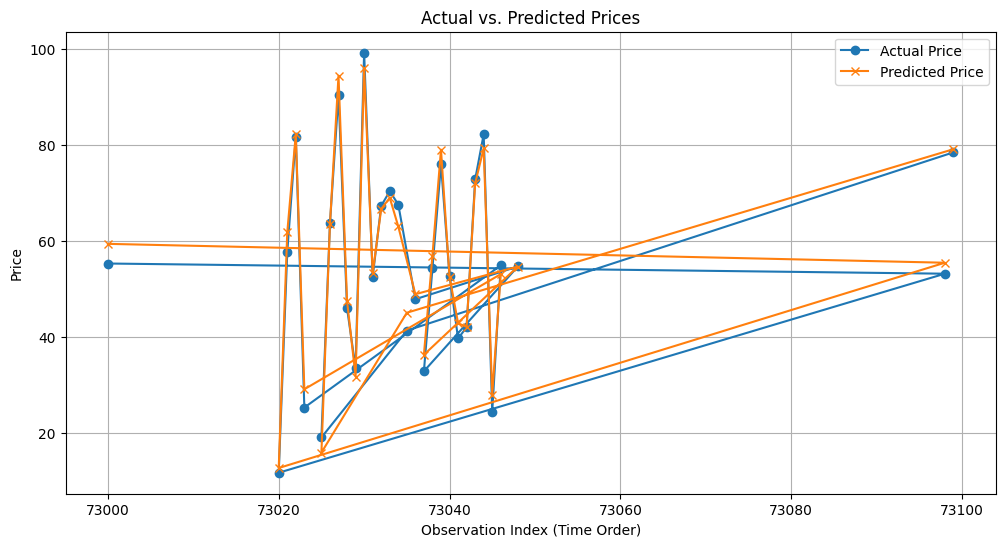

In [35]:
plt.figure(figsize=(12, 6))
plt.plot(y_test.index, y_test.values, label='Actual Price', marker='o')
plt.plot(y_test.index, y_pred, label='Predicted Price', marker='x')
plt.xlabel('Observation Index (Time Order)')
plt.ylabel('Price')
plt.title('Actual vs. Predicted Prices')
plt.legend()
plt.grid(True)
plt.show()

In [42]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30 entries, 73000 to 73099
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Inventory Level          30 non-null     int64  
 1   Units Sold               30 non-null     int64  
 2   Units Ordered            30 non-null     int64  
 3   Demand Forecast          30 non-null     float64
 4   Discount                 30 non-null     int64  
 5   Holiday/Promotion        30 non-null     int64  
 6   Competitor Pricing       30 non-null     float64
 7   Year                     30 non-null     int32  
 8   Month                    30 non-null     int32  
 9   Day                      30 non-null     int32  
 10  Weekday                  30 non-null     int32  
 11  Category_Electronics     30 non-null     bool   
 12  Category_Furniture       30 non-null     bool   
 13  Category_Groceries       30 non-null     bool   
 14  Category_Toys            3

In [43]:
def dynamic_pricing_recommendation(row, predicted_price):
    if row['Units Sold'] > row['Demand Forecast'] and row['Competitor Pricing'] < predicted_price:
        return row['Competitor Pricing'] - 0.50
    elif row['Inventory Level'] < 50:
        return predicted_price * 1.05
    else:
        return predicted_price


In [44]:
recommendations = []
for i, row in X_test.iterrows():
    pred_price = model.predict(row.values.reshape(1, -1))[0]
    rec = dynamic_pricing_recommendation(row, pred_price)
    recommendations.append(rec)

In [46]:
results = pd.DataFrame({
    "Actual Price": y_test,
    "Predicted Price": y_pred,
    "Dynamic Recommendation": recommendations,
    "Competitor Pricing": X_test['Competitor Pricing']
}, index=y_test.index)

In [47]:
print("Pricing Recommendations:")
results.head(15)

Pricing Recommendations:


,Actual Price,Predicted Price,Dynamic Recommendation,Competitor Pricing
73000,55.26,59.351532,59.351532,59.37
73098,53.14,55.423618,55.423618,55.80
73020,11.72,12.699473,12.699473,10.35
73021,57.66,61.716824,61.716824,61.76
73022,81.61,82.201088,82.201088,83.36
73023,25.28,29.089527,29.089527,28.71
73046,54.87,53.056076,53.056076,52.90
73045,24.39,27.954586,27.954586,28.31
73044,82.16,79.225853,79.225853,79.32
73043,72.75,71.923576,71.923576,72.20
